On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
train_df = pd.read_csv('/Users/apple/Learning python/titanic/train.csv')

In [3]:
#quick look into the train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Data summary - numerical var
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Data summary - categorical var
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Windelov, Mr. Einar",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [6]:
#Missing data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Correcting data: Remove PassengerId, Name, Ticket as they are not very likely to affect survival. Remove Cabin as they contains too many missing values. Dropping 2 cases where Embarked is missing as they are to small to take into consideration. Dropping 177 cases where Age is missing as there is not enough data to guess the missing values.

In [7]:
#Correcting data
train_df_new = train_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train_df_new = train_df_new.dropna(subset=['Embarked'])
train_df_new = train_df_new.dropna(subset=['Age'])
train_df_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [8]:
train_df_new.describe(include=['O'])

,Sex,Embarked
count,712,712
unique,2,3
top,male,S
freq,453,554


In [9]:
#Visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[Text(0,0.5,'% survived')]

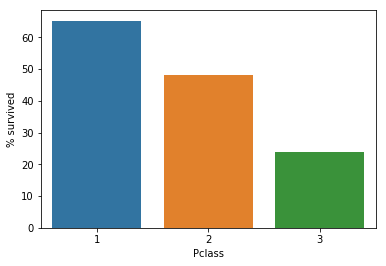

In [10]:
#Pclass
Pclass_plot=sns.barplot(x='Pclass',y='Survived', data = train_df_new, estimator = lambda y: sum(y==1)*100/len(y), ci=None)
Pclass_plot.set(ylabel='% survived')

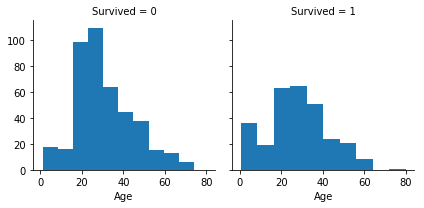

In [11]:
#Age 
age_plot = sns.FacetGrid(train_df_new, col ='Survived')
age_plot = age_plot.map(plt.hist, 'Age', bins=10)

In [12]:
data = train_df_new
data.loc[data.Age<=18,'Age']=1

In [13]:
data.loc[(data.Age>18)&(data.Age<=28),'Age']=2

In [14]:
data.loc[(data.Age>28)&(data.Age<=38),'Age']=3

In [15]:
data.loc[data.Age>38,'Age']=4

[Text(0,0.5,'% survived')]

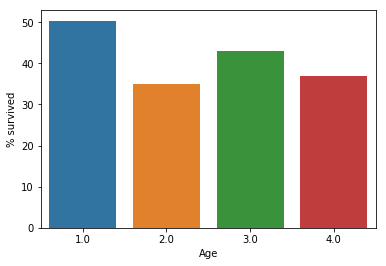

In [16]:
Age_group=sns.barplot(x='Age',y='Survived', data = data, estimator = lambda y: sum(y==1)*100/len(y), ci=None)
Age_group.set(ylabel='% survived')

[Text(0,0.5,'% survived')]

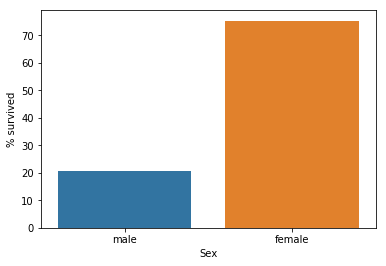

In [17]:
#Gender     
Sex_plot=sns.barplot(x='Sex',y='Survived', data = train_df_new, estimator = lambda y: sum(y==1)*100/len(y), ci=None)
Sex_plot.set(ylabel='% survived')

In [18]:
#Converting male = 1, female = 2
def gender_transform(s):
    if s == 'male':
        return 1
    else:
        return 2
data['Gender']=data['Sex'].apply(gender_transform)

[Text(0,0.5,'% survived')]

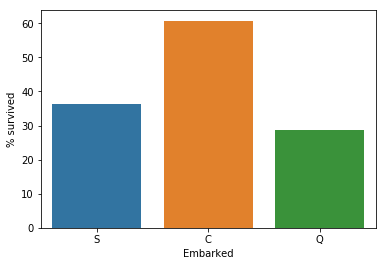

In [26]:
#Embarkation
Embark_plot=sns.barplot(x='Embarked',y='Survived', data = train_df_new, estimator = lambda y: sum(y==1)*100/len(y), ci=None)
Embark_plot.set(ylabel='% survived')

In [20]:
#Converting S = 1, C = 2, Q = 3
def embark(s):
    if s == 'S':
        return 1
    elif s == 'C':
        return 2
    else: 
        return 3
data['Embrk']=data['Embarked'].apply(embark)

In [21]:
#Create new feature: whether the passenger travelled alone
def isalone(passenger):
    sb,par = passenger
    if sb == 0 & par == 0:
        return 1
    else:
        return 0
data['IsAlone']=data[['SibSp','Parch']].apply(isalone,axis=1)
data[['Survived','IsAlone']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.473251
1,1,0.368870


In [27]:
#Logistic regression model with 
import statsmodels.api as sm
X=data[['Gender','Age','Pclass','Embrk','IsAlone']]
X=sm.add_constant(X)
y=data['Survived']
logit_model=sm.Logit(y,X.astype(float)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.459680
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Feb 2019   Pseudo R-squ.:                  0.3188
Time:                        19:05:42   Log-Likelihood:                -327.29
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 4.385e-64
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5635      0.585     -0.963      0.336      -1.711       0.584
Gender         2.5434      0.210     12.139      0.000       2.133       2.954
Age           -0.4045      0.102     -3.972      0.000      -0.604      -0.205
Pclass        -1.2005      0.136     -8.823      0.000      -1.467      -0.934
Embrk          0.1414      0.187      0.756      0.449      -0.225       0.508
IsAlone        0.1685      0.207      0.814      0.416      -0.237       0.574
==============================================================================
"""